Stock Market Prediction (LSTM)

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,Bidirectional




In [153]:
df = pd.read_csv('TESLA.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-02,294.003326,307.833344,292.666656,300.586670,300.586670,95577600
1,2022-08-03,305.000000,309.549988,301.149994,307.396667,307.396667,80091000
2,2022-08-04,311.000000,313.606659,305.000000,308.633331,308.633331,72256200
3,2022-08-05,302.670013,304.606659,285.543335,288.170013,288.170013,113172900
4,2022-08-08,295.000000,305.200012,289.086670,290.423340,290.423340,98994000
5,2022-08-09,290.293335,292.396667,279.353333,283.333344,283.333344,86244600
6,2022-08-10,297.066681,297.510010,283.369995,294.356659,294.356659,94918800
7,2022-08-11,296.513336,298.236664,285.833344,286.630005,286.630005,70155000
8,2022-08-12,289.416656,300.160004,285.033325,300.029999,300.029999,79657200
9,2022-08-15,301.786682,313.133331,301.230011,309.320007,309.320007,89359200


In [154]:
print("Shape of data :",df.shape)

Shape of data : (252, 7)


In [155]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,213.217910,217.762619,208.170503,212.997341,212.997341,1.249227e+08
std,53.320486,53.722231,52.664994,53.068826,53.068826,4.905121e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.902500,182.459999,172.507496,178.762501,178.762501,8.679818e+07
50%,198.919998,203.474998,193.599998,197.684998,197.684998,1.200864e+08
75%,261.937500,268.010002,257.892502,262.052490,262.052490,1.598709e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [157]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [158]:
df=df[['Date','Open','Close']]
df['Date']=pd.to_datetime(df['Date'].apply(lambda x: x.split()[0]))
df.set_index('Date',drop=True ,inplace=True)
df.head(10)

,Open,Close
Date,,
2022-08-02,294.003326,300.586670
2022-08-03,305.000000,307.396667
2022-08-04,311.000000,308.633331
2022-08-05,302.670013,288.170013
2022-08-08,295.000000,290.423340
2022-08-09,290.293335,283.333344
2022-08-10,297.066681,294.356659
2022-08-11,296.513336,286.630005
2022-08-12,289.416656,300.029999


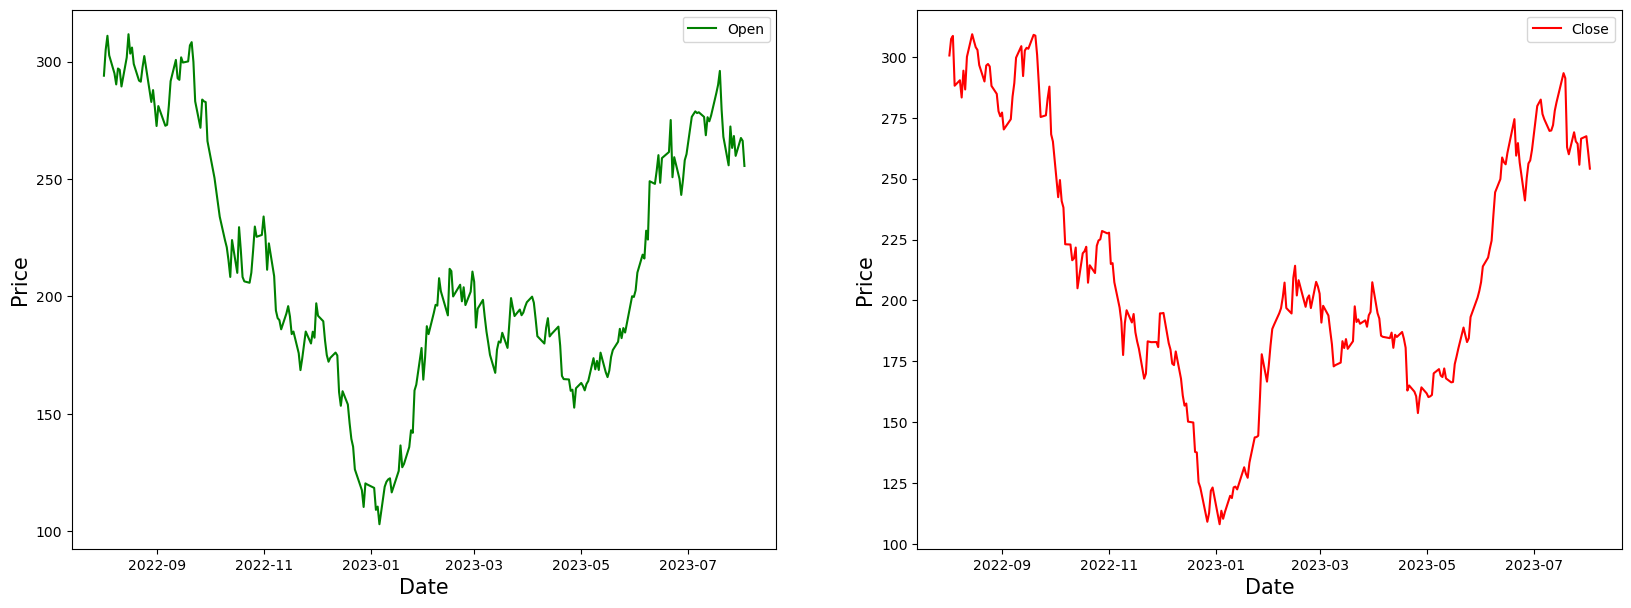

In [159]:
fig ,ax = plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [160]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2022-08-02,0.915351,0.956598
2022-08-03,0.968051,0.990442
2022-08-04,0.996805,0.996587
2022-08-05,0.956885,0.894891
2022-08-08,0.920128,0.906090
2022-08-09,0.897572,0.870854
2022-08-10,0.930032,0.925637
2022-08-11,0.927380,0.887238
2022-08-12,0.893371,0.953832


In [161]:
training_size = round(len(df)*0.75)
training_size

189

In [162]:
train_data = df[:training_size]
test_data = df[training_size:]

train_data.shape ,test_data.shape

((189, 2), (63, 2))

In [163]:

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [164]:
train_seq ,train_label = create_sequence(train_data)
test_seq , test_label = create_sequence(test_data)
train_seq.shape , train_label.shape , test_seq.shape , test_label.shape

((139, 50, 2), (139, 2), (13, 50, 2), (13, 2))

In [165]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [166]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/100
5/5 [==============================] - 9s 433ms/step - loss: 0.0844 - mean_absolute_error: 0.2557 - val_loss: 0.0634 - val_mean_absolute_error: 0.2424
Epoch 2/100
5/5 [==============================] - 0s 66ms/step - loss: 0.0194 - mean_absolute_error: 0.1161 - val_loss: 0.0075 - val_mean_absolute_error: 0.0609
Epoch 3/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0135 - mean_absolute_error: 0.0945 - val_loss: 0.0775 - val_mean_absolute_error: 0.2707
Epoch 4/100
5/5 [==============================] - 0s 92ms/step - loss: 0.0133 - mean_absolute_error: 0.0958 - val_loss: 0.0738 - val_mean_absolute_error: 0.2639
Epoch 5/100
5/5 [==============================] - 0s 102ms/step - loss: 0.0099 - mean_absolute_error: 0.0797 - val_loss: 0.0304 - val_mean_absolute_error: 0.1622
Epoch 6/100
5/5 [==============================] - 0s 81ms/step - loss: 0.0092 - mean_absolute_error: 0.0768 - val_loss: 0.0186 - val_mean_absolute_error: 0.1205
Epoch 7/100
5/5 [=========

In [167]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

1/1 [==============================] - 1s 1s/step


array([[0.76156205, 0.74690497],
       [0.77295387, 0.75867164],
       [0.7877974 , 0.7740005 ],
       [0.8011145 , 0.78665674],
       [0.7904174 , 0.771582  ]], dtype=float32)

In [168]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[261.9126 , 258.3922 ],
       [264.2897 , 260.75992],
       [267.38702, 263.8444 ],
       [270.16586, 266.39105],
       [267.93375, 263.35773]], dtype=float32)

In [170]:
df_merge = pd.concat([df.iloc[-13:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-13:].index)], axis=1)

In [171]:
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()


,Open,Close,open_predicted,close_predicted
Date,,,,
2023-07-17,286.630005,290.380005,261.912598,258.392212
2023-07-18,290.149994,293.339996,264.289703,260.759918
2023-07-19,296.040009,291.260010,267.387024,263.844391
2023-07-20,279.559998,262.899994,270.165863,266.391052
2023-07-21,268.000000,260.019989,267.933746,263.357727


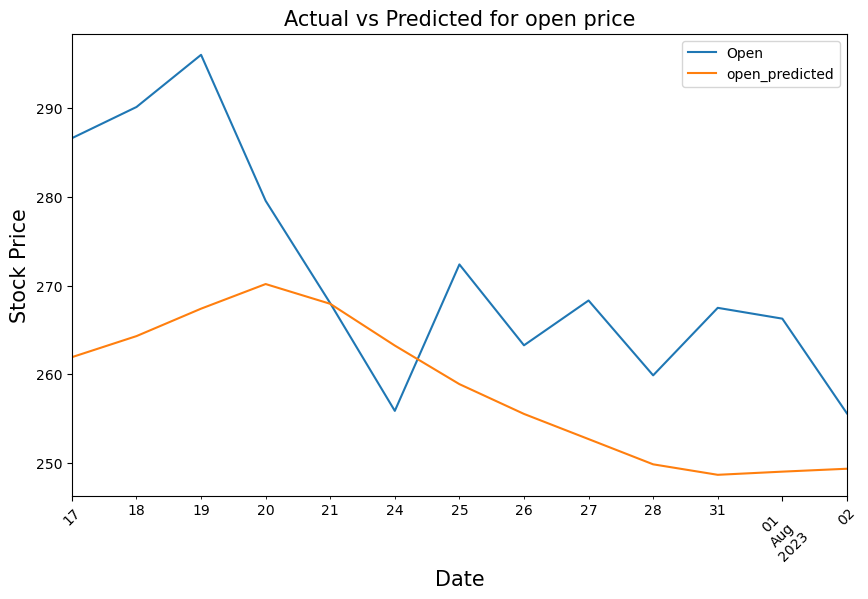

In [172]:
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

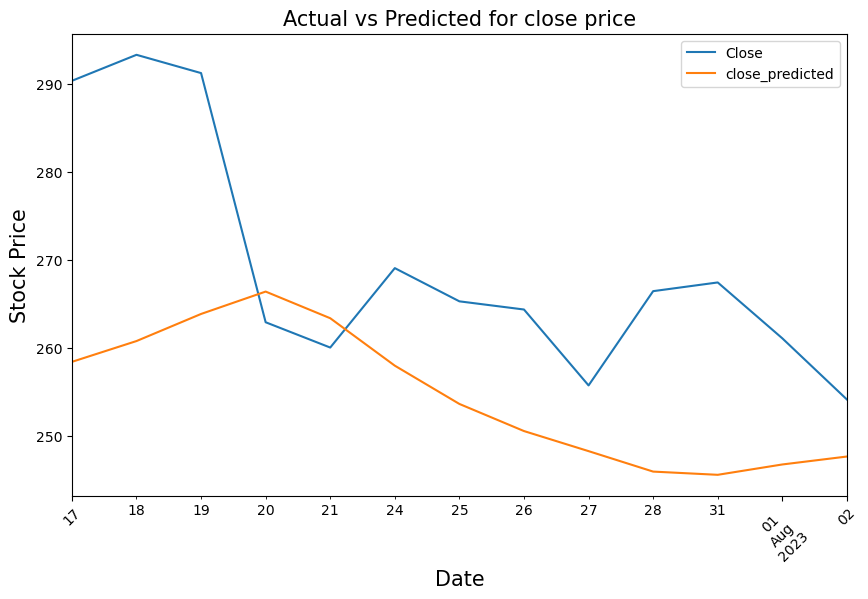

In [173]:
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [174]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2023-07-30':'2023-08-10']

,Open,Close,open_predicted,close_predicted
2023-07-31,267.480011,267.429993,248.633972,245.535843
2023-08-01,266.260010,261.070007,248.991379,246.712753
2023-08-02,255.570007,254.110001,249.319107,247.616501
2023-08-03,NaN,NaN,NaN,NaN
2023-08-04,NaN,NaN,NaN,NaN
2023-08-05,NaN,NaN,NaN,NaN
2023-08-06,NaN,NaN,NaN,NaN
2023-08-07,NaN,NaN,NaN,NaN
2023-08-08,NaN,NaN,NaN,NaN
2023-08-09,NaN,NaN,NaN,NaN


In [175]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [176]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 36ms/step


In [177]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

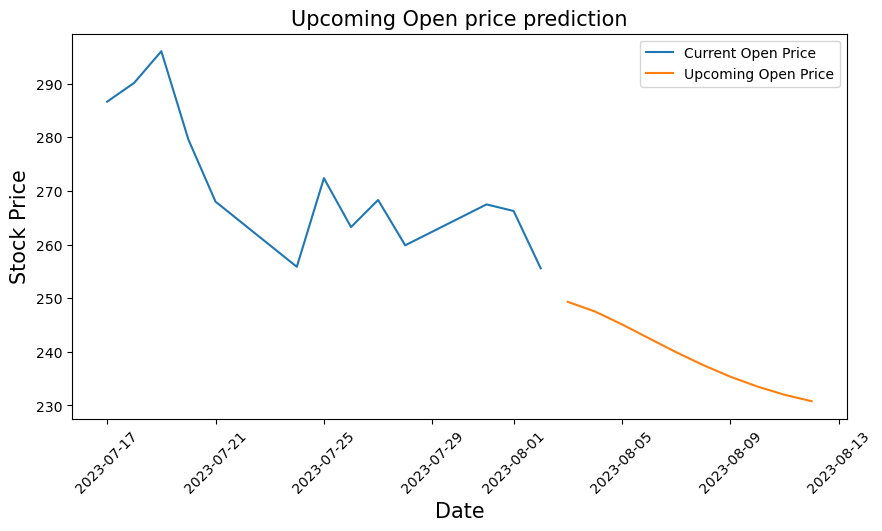

In [178]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-05-22':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-05-22':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

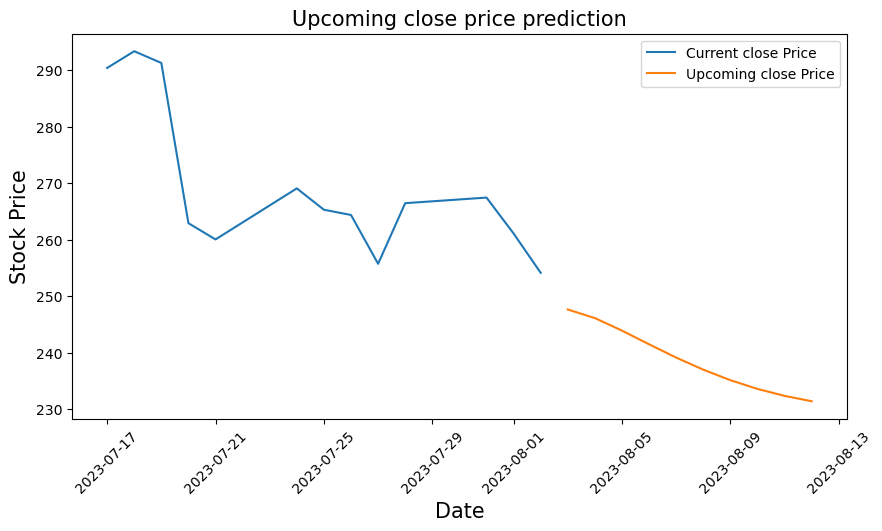

In [179]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-05-22':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2023-05-22':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()